In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [53]:
import csv
f = open('r1_file.csv','r', encoding = 'UTF-8-sig')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()

['0', '말투 깬다', '1']
['1', '요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '1']
['2', '저 짧은 몇 마디에서 인성이 보이넴 ..', '1']
['3', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '1']
['4', '정신분열 잼 ㅋㅋㅋ', '1']
['5', '실력에비해 오래갔다', '1']
['6', '거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가?', '1']
['7', '점점... 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다', '1']
['8', '말하는거 저급해...', '1']
['9', '말투가 왜저래ㅋㅋ', '1']
['10', '아무리 그래도 그렇지 말투가 저게 뭐냐;', '1']
['11', '왜저래 비꼰데?? 힘들면 그냥 조용히 탈퇴하세요~ 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 ..다들 얼굴에 생기가 없고 초심도 잃은거 같고 ..배부르지?? 그만하고 쉬어라 다들 ..팬 많지? 금방 썰물처럼 다 휩쓸려간다 ~너희 아무것도 아니다~ 배부른 소리하고 자빠졌네 ~비호감이네 진짜', '1']
['12', '아무리봐도 잘못 뽑은 것 같다', '1']
['13', '인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참;;;', '1']
['14', '인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이', '1']
['15', '진짜 예민하네;', '1']
['16', '와...좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게....당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을....ㅉㅉ', '1']
['17', '윽..진짜 말투 이런다고???', '1']
['18', '말 더럽게 싸

['68', '항상 진심 아닌적이 없지 힐링이야!!', '0']
['69', '잘커서 이젠 너무멋지기까지....', '0']
['70', '최고의위치에있어도 언제나 처음처럼  팬분들 스탭분들 챙기는모습 너무예쁘고 기특해  ', '0']
['71', '미담은 털어도 끝이없는데', '0']
['72', '사랑하는데 이유 없음 선한 것에 본능처럼 끌리더라', '0']
['73', '팬이라서 너무행복해요  ', '0']
['74', '미담제조기 그 자체네', '0']
['75', '항상 행복하게 웃을수 있기를', '0']
['76', '이분을 보면서 생각이 많이 바뀌었어요 이렇게 성실하고 소탈하고 마음 따뜻한, 또 그게 한결같은 사람도 있구나 하구요. 자기 길 열심히 가면 좋겠어요. 언제까지나 응원합니다.', '0']
['77', '따뜻한 마음씨', '0']
['78', '사람 잘 챙기고 인성바른거 아는 사람은 다아는데..', '0']
['79', '사랑한다', '0']
['80', '주변에는 칭찬해주고 예뻐해주는 사람들만 있길 바래.... 무슨일이잇어도 항상 응원할게', '0']
['81', '항상 응원해', '0']
['82', '착하고 잘생기구 사랑스러워 열심히 응원하고 지킬거야 사랑해', '0']
['83', '마음씨도 예쁘네', '0']
['84', '믿고 응원해!!!!', '0']
['85', '다정하고 따뜻한 마음씨  잘 알지', '0']
['86', '따뜻하고 다정한 마음씨를 가졌지', '0']
['87', '잡은 손은 절대 놓지 않아 사랑만 줄게', '0']
['88', '착해 착해', '0']
['89', '맘이 이쁘고 따뜻한 전다정씨', '0']
['90', '마음 씀씀이가 한결같아요~언제나 응원합니다', '0']
['91', '수많은 영상을 보면 언제나 진심 한가득이 보여요. 그 마음 잘 전달되고 있으니까 힘내서 같이가요.', '0']
['92', '무슨일이 있어도 행복해야해 알겟지?!!!', '0']
['93', '나이는 어리지만  마음씀씀이가

['848', '정신병 인거 같네...', '1']
['849', '진짜 미쳣나봐;;', '1']
['850', '치아라 이제 기사도 그만할때안됬나? 저얼굴보기도싫어', '1']
['851', '얘 쫌 이상한듯..', '1']
['852', '그냥 가만있는게..', '1']
['853', '지랄도 병이다', '1']
['854', '네 다음 관종', '1']
['855', '이상해 이상해', '1']
['856', '돌+i중 젤 똘', '1']
['857', '쫌 정신적으로 이상한것같다....평범하진않아....;;;', '1']
['858', '미친 사람..', '1']
['859', '아니 눈빛 이상한거 같은거 기분탓인가......', '1']
['860', '못났다~', '1']
['861', '걍 잠정은퇴 하는게...', '1']
['862', '무서워', '1']
['863', '강제 입원 안되냐?', '1']
['864', '진짜 자증난다  미성숙한인간', '1']
['865', '정신병이다 이 정도면', '1']
['866', '이상하다~무섭다', '1']
['867', '죽음으로길을정했구나.치유할수없는길로가는구나', '1']
['868', '조울증..', '1']
['869', '관종인가...', '1']
['870', '관종이야? 좋게봤는데 점점 심해져', '1']
['871', '미친관종', '1']
['872', '얘  이상해', '1']
['873', '눈 똑바로뜨고 아랫도리 조심하고', '1']
['874', '이러다 자살할까 겁난다야', '1']
['875', '얘는 약빤 년 같음 진심ㅡㅡ', '1']
['876', '그냥 관종', '1']
['877', '생 ㄸㄹㅇ', '1']
['878', '지랄이노', '1']
['879', '혀 먹고싶다', '1']
['880', '제발 정신병원서 심리상담 좀 받아', '1']
['881', '역겹다', '1']
['882', '쓰레기년', '1']
['0', 'ㅈㄴ예뻐 진짜', '0']
['1'

['159', '피땀눈물 연말에는 미국에서 꼭 이모습 보고싶구나💜', '0']
['160', '피땀눈물이 교훈!', '0']
['161', '하,, 넘 대단하고 대단해', '0']
['162', '하나만 잘해도 천재소리 듣는데 못하는게  없네', '0']
['163', '하루하루가 순삭 당신 관련 동영상 보느라 바뻐', '0']
['164', '학창 시절 일화 들어보면 그때도 본인이 하고자하는 일에 남다른 열정, 노력 보인 사람 최고가 될 수밖에 없다는', '0']
['165', '학창 시절부터 슈스가 된 현재까지도 끊임없이 노력하는 사람 천재가 열심히 노력하니 최고가 될 수밖에 없네요', '0']
['166', '학창시절부터 얼마나 열심이 최선을 다하며 살아왔는지가 느껴지는 감동의 글입니다', '0']
['167', '한결같은 따뜻한 마음과 실력 모든 걸 갖춘 사람!', '0']
['168', '한결같은 모습 정말 좋아요', '0']
['169', '한결같은 진심이 인기비결인 사람. 사랑합니다', '0']
['170', '한국의 이미지와 위상을 높이는 일등공신', '0']
['171', '한남 ㅉㅉ 쓰레기들', '1']
['172', '무한매력마력으로 무장한 천부적재능에다 노력까지. 최고 아티스트', '0']
['173', '볼수록, 알아갈수록, 해가 갈수록, 정말 대단하고 존경스러운 사람. 그저 건강하기만을 바랄게. 네 무대 오래오래 보는게 꿈이야', '0']
['174', '항상 응원할게요!!', '0']
['175', '항상 감동과 사랑만 주는 당신 사랑해~~ 오래오래 함께하자~!', '0']
['176', '항상 기대이상을 보여주는 사람이라서 오늘보다 내일이 더기대되네요 더높이오를거에요', '0']
['177', '항상 노력하는 당신 응원해요', '0']
['178', '항상 노력하는 모습 멋있다~♡♡', '0']
['179', '항상 노력하는모습 너무고맙죠. 진정한 아티스트죠', '0']
['180', '항상 멋진..최고..♡', '0']
['181

In [54]:
dic = pd.read_csv('r1_file.csv',encoding = 'UTF-8-sig')
dic[:5]

,0,말투 깬다,1
0,1,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,2,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,3,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,4,정신분열 잼 ㅋㅋㅋ,1
4,5,실력에비해 오래갔다,1


In [55]:
dic.columns = ['0', 'comment', 'label']
dic[:5]

,0,comment,label
0,1,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,2,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,3,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,4,정신분열 잼 ㅋㅋㅋ,1
4,5,실력에비해 오래갔다,1


In [56]:
comment_data = dic[['comment','label']]
comment_data[:5]

,comment,label
0,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악...,1
1,저 짧은 몇 마디에서 인성이 보이넴 ..,1
2,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
3,정신분열 잼 ㅋㅋㅋ,1
4,실력에비해 오래갔다,1


In [57]:
print(len(comment_data)) # 댓글 개수 출력

9316


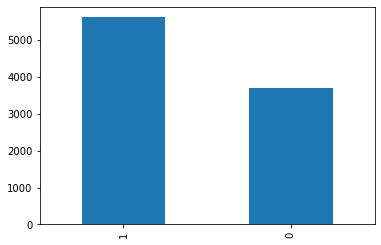

In [58]:
comment_data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [59]:
X_data = comment_data['comment']
y_data = comment_data['label']
print('comment 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

comment 개수: 9316
rating개수: 9316


In [60]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)
print(normalized_text[:5])

['요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '저 짧은 몇 마디에서 인성이 보이넴 ', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '정신분열 잼 ㅋㅋㅋ', '실력에비해 오래갔다']


In [66]:
comment_data.comment = normalized_text
print(comment_data.comment)

0       요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯 조금만 비판해도 악플...
1                                    저 짧은 몇 마디에서 인성이 보이넴 
2                개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ
3                                              정신분열 잼 ㅋㅋㅋ
4                                              실력에비해 오래갔다
                              ...                        
9311                                             정말 멋있네요 
9312                                                응원합니다
9313                                          멋져 멋져 대단하심 
9314                                              진짜 멋지네요
9315                                            멋있다 엄지 척 
Name: comment, Length: 9316, dtype: object


In [62]:
 stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']#불용어 제거하기

In [9]:
okt = Okt()
okt.morphs(comment_data.comment, stem = True)

RuntimeError: java.lang.ClassNotFoundException: org.jpype.Utility

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1234)

In [39]:
X_train[:5]

7892              무대위에 제왕이면서 평소 겸손하고 남을 배려하는 모습이 참 보기 좋네요
205                                             얘네들도 배불렀네
3703                                        아 진짜 죽여버리고 싶어
7475    진짜 지민이 무대를 보고 팬이 안될수가 없어 너무 잘하고 먼가 눈을 뗄수 없이 매력...
4786                      이러다 극에 달하면 약먹고 자살도하겠다 내가 가면되나 ㅎ
Name: comment, dtype: object

In [40]:
print(comment_data.isnull().values.any()) #NULL값 있는지 없는지 출력

False
